In [1]:
import sys
sys.path.insert(1, '../../..')

In [2]:
import numpy as np
import pandas as pd
from medicine.models.compound import Compound
from medicine.models.medicine import Medicine
from mlxtend.preprocessing import TransactionEncoder
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
compound_list = []
for compound in Compound.query.all():
    medicine_list = [medicine.name for medicine in compound.medicine]
    compound_list.append(medicine_list)

F:\Python\anaconda3\lib\site-packages\sqlalchemy\engine\default.py:470: Warning: (1366, "Incorrect string value: '\\xA5x\\xA5_\\xBC\\xD0...' for column 'VARIABLE_VALUE' at row 480")
  cursor.execute(statement, parameters)


In [4]:
df = pd.DataFrame({'medicines':compound_list}, index=[c.name for c in Compound.query.all()])
df.head(10)

,medicines
滅瘢痕,[夏冰]
闢禳時疫,[半天河]
身體白駁,[半天河]
目不得瞑,"[流水, 半夏]"
汗後奔豚,"[流水, 甘草, 茯苓]"
服藥過劑煩悶,[流水]
九竅出血,"[井華水, 丹砂]"
衄血不止,[井華水]
衄血不止,[井華水]
衄血不止,[井華水]


In [5]:
te = TransactionEncoder()
te_ary = te.fit(compound_list).transform(compound_list)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head(10)

,丁香,三七,三歲陳棗核中仁,不灰木,丹參,丹砂,丹黍米,乳汁,乳腐,乾薑,...,鼠李,鼬鼠,齑水,齒,龍珠,龍眼,龍腦香,龍膽,龍舌草,龍葵
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pylab as plt

%matplotlib inline

In [7]:
df.head(10)

,丁香,三七,三歲陳棗核中仁,不灰木,丹參,丹砂,丹黍米,乳汁,乳腐,乾薑,...,鼠李,鼬鼠,齑水,齒,龍珠,龍眼,龍腦香,龍膽,龍舌草,龍葵
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


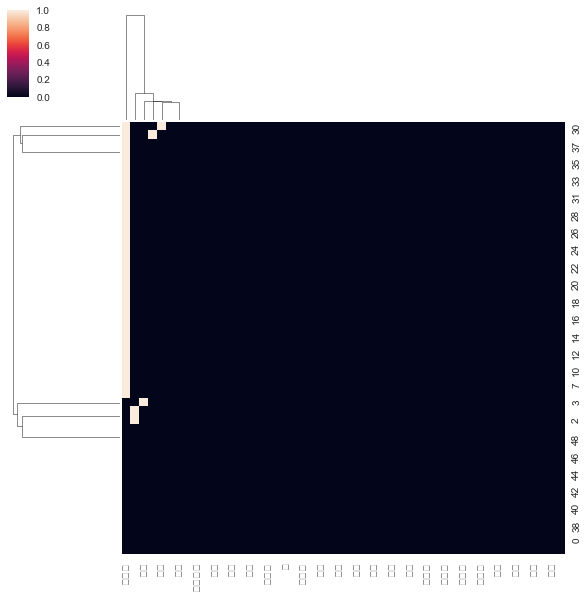

In [8]:
g = sns.clustermap(df.iloc[0:50,0:50].astype(int))

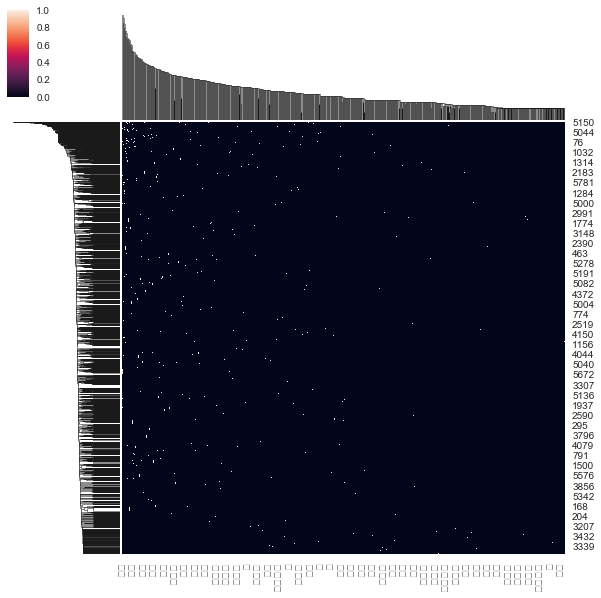

In [9]:
g = sns.clustermap(df.astype(int))